# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.

## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`instacart_orders.csv`, `products.csv`, `aisles.csv`, `departments.csv` y `order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Lo primero a realizar es importar pandas, leer cada dataset y sacar info general, con ello veremos que cambios se necesitan. 

Este espacio es dedicado a un vistazo general para identificar los siguientes aspectos:
- Outliers
- Duplicados
- Nulos
- Snake_case

En función al tipo de aspecto encontrado, se procederá a realizar una modificación, esto para simplificar el proceso de análisis


In [104]:
import pandas as pd
from matplotlib import pyplot as plt
pd.DataFrame.iteritems = pd.DataFrame.items
import numpy as np

In [58]:
instacart = pd.read_csv(r'E:\análisis de datos\datasets\instacart_orders.csv', sep=';')
products = pd.read_csv(r'E:\análisis de datos\datasets\products.csv',sep=';')
aisles = pd.read_csv(r'E:\análisis de datos\datasets\aisles.csv',sep=';')
departments = pd.read_csv(r'E:\análisis de datos\datasets\departments.csv',sep=';')
orders = pd.read_csv(r'E:\análisis de datos\datasets\order_products.csv',sep=';')

In [59]:
instacart.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [60]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [61]:
products.head(1)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19


In [62]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [63]:
departments.head(1)

,department_id,department
0,1,frozen


In [64]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [65]:
orders.head(1)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0


In [66]:
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [67]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [68]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para cada evaluación, se analizarán los datos para encontrar por que se duplican, porqué son atípicos y porqué serán nulos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [69]:
print(f'Este dataframe contiene {instacart.duplicated().sum()} duplicados')

Este dataframe contiene 15 duplicados


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [70]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
instacart_wednesday_2am = instacart[(instacart['order_dow']==3) & (instacart['order_hour_of_day']==2)]
instacart_wednesday_2am_duplicated = instacart_wednesday_2am.duplicated()
row_duplicates = instacart_wednesday_2am[instacart_wednesday_2am_duplicated]
print(f'Este filtro contiene {instacart_wednesday_2am_duplicated.sum()} valores duplicados')

Este filtro contiene 15 valores duplicados


¿Qué sugiere este resultado?

El día miércoles hubo 15 valores duplicados. Fue el único día que hubo duplicados, ya que en total eran 15 en el data set instacart_orders. Por lo que podemos mencionar que hubo un problema el día miercoles a las 2 am, ya que se presentaron 15 pedidos duplicados.

In [71]:
instacart = instacart.drop_duplicates().reset_index(drop=True)
# Elimina los pedidos duplicados

In [72]:
print(instacart.duplicated().sum())
# Vuelve a verificar si hay filas duplicadas

0


In [73]:
print(instacart['order_id'].duplicated().sum())
# Vuelve a verificar si hay IDs duplicados de pedidos

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Encontré que habia 15 lineas completamente duplicadas, siendo todas el día miercoles a las 2:00 am, procedí a eliminarlos con el método drop_duplicates() y a reasignar el indice. 

### `products` data frame

In [74]:
print(f'Este dataframe contiene {products.duplicated().sum()} filas duplicadas')

Este dataframe contiene 0 filas duplicadas


In [75]:
print(f'Esta columna contiene {products['product_id'].duplicated().sum()} valores duplicados')

# Verifica si hay IDs duplicadas de productos

Esta columna contiene 0 valores duplicados


In [76]:
product_upper = products['product_name'].str.upper()
print(f'Esta columna contiene {product_upper.duplicated().sum()} valores duplicados')
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

Esta columna contiene 1361 valores duplicados


In [77]:
print(f'Del total de duplicados, {product_upper.isna().sum()} son valores ausentes')
# Revisa si hay nombres duplicados de productos no faltantes

Del total de duplicados, 1258 son valores ausentes


In [78]:
products['product_name'].fillna('Unknown',inplace=True)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay filas completamente duplicadas, pero hay 1361 nombres duplicados de productos, de los cuales 1258 son ausentes.

Procedí a rellenar los nombres de productos nulos por la leyenda "Unknown" que se traduce como desconocido.

Realmente no es importante eliminar los valores duplicados de nombres de artículos, esto nos indica que se han comprado varias veces un mísmo producto, no refiere a una fila o pedido duplicado, solo la recompra del producto, incluso es bueno ver que hay recompra de los productos.

### `aisles` data frame

In [79]:
print(f'Este dataframe contiene {aisles.duplicated().sum()} filas completamente duplicadas')
# Revisa si hay filas totalmente duplicadas

Este dataframe contiene 0 filas completamente duplicadas


### `departments` data frame

In [80]:
print(f'Este dataframe contiene {departments.duplicated().sum()} filas completamente duplicadas')
# Revisa si hay filas totalmente duplicadas

Este dataframe contiene 0 filas completamente duplicadas


In [81]:
print(f'Esta columna contiene {departments['department_id'].duplicated().sum()} valores duplicados')
# Revisa si hay IDs duplicadas de productos

Esta columna contiene 0 valores duplicados


No hay datos duplicados en el data frame departments, son 21 filas, de la 0 a la 20, donde no hubo recuento de filas totalmente duplicadas y tampoco al filtrar la columna department_id se encontraron id's duplicados.

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [82]:
print(f'Este dataframe contiene {orders.duplicated().sum()} filas completamente duplicadas')
# Revisa si hay filas totalmente duplicadas

Este dataframe contiene 0 filas completamente duplicadas


In [83]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
for col_name, col_data in orders.iteritems():
    print(f"La columna {col_name} tiene {col_data.duplicated().sum()} valores duplicados")

La columna order_id tiene 4094961 valores duplicados
La columna product_id tiene 4499434 valores duplicados
La columna add_to_cart_order tiene 4544942 valores duplicados
La columna reordered tiene 4545005 valores duplicados


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Filas totalmente duplicadas no hay, pero por columna si hay datos duplicados. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

En este caso, ya se había rellenado los valores ausentes por la leyenda unknown, por lo que se evalua si aun contiene ausentes.

In [84]:
print(f'Este dataframe tiene {products['product_name'].isna().sum()} valores ausentes')

Este dataframe tiene 0 valores ausentes


Como vemos, ya no contiene ausentes, se decidió rellenar ya que lo único que no se conoce es el nombre del producto, pero los otros datos nos pueden ser de utilidad.

In [85]:
print(products[products['aisle_id']==100])
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Todos los nombres ausentes corresponden con el pasillo 100, toda la información del pasillo 100 tenía NaN como nombre y fue cambiado a Unknown.

In [86]:
print(products[products['department_id']==21])
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Todos los nombres ausentes coinciden con el departamento 21. Cuando filtramos los productos por el departamento 21, encontramos unknown en los nombres de productos.

In [87]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(departments[departments['department_id']==21])
print('-'*30)
print(aisles[aisles['aisle_id']==100])

    department_id department
20             21    missing
------------------------------
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

Los valores ausentes en nuestro data frame corresponde al departamento 21 y pasillo 100, por lo que podríamos decir que se omitieron los nombres en la captura de datos, hubo algun problema o alguna otra razón.

### `orders` data frame

In [88]:
orders.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [89]:
print(f'El valor mínimo del orden en agregar al carrito es: {orders['add_to_cart_order'].min()}')
print()
print(f'El valor máximo del orden en agregar al carrito es: {orders['add_to_cart_order'].max()}')


# ¿Cuáles son los valores mínimos y máximos en esta columna?

El valor mínimo del orden en agregar al carrito es: 1.0

El valor máximo del orden en agregar al carrito es: 64.0


In [90]:
rows_with_nans = orders[(orders['add_to_cart_order'].isna())]
rows_with_nans
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [91]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido
op_nan = orders[orders['order_id'].isin(rows_with_nans['order_id'])]
total_orders_nans = op_nan.groupby('order_id')['product_id'].count().min()
print(f'Los pedidos que tienen ausentes coinciden con tener un mínimo de {total_orders_nans} productos')
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


Los pedidos que tienen ausentes coinciden con tener un mínimo de 65 productos


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Descubrí que los valores ausentes se producen cuando se hicieron más de 64 productos.

In [92]:
orders['add_to_cart_order'] = orders['add_to_cart_order'].fillna('999')

print(orders['add_to_cart_order'].map(int))

# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Comprendí que es importante preprocesar los datos, ya que puede haber problemas con su calidad, existiendo malos formatos de captura, ambiguedades, duplicados, omitidos o ausentes. Por lo que es importante modificarlos para tener una calidad importante.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [106]:
print(f'Rango de horas {np.sort(instacart['order_hour_of_day'].unique())}')

Rango de horas [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [108]:
print(f'Rango de días {np.sort(instacart['order_dow'].unique())}')

Rango de días [0 1 2 3 4 5 6]


Ambas columnas se encuentran en los rangos establecidos

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<Axes: xlabel='order_hour_of_day'>

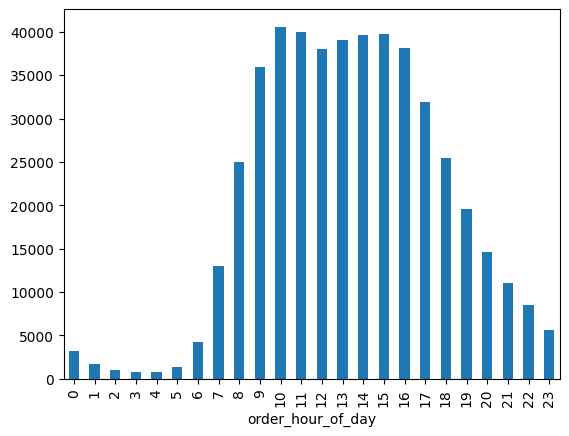

In [110]:
orders_per_hour = instacart.groupby('order_hour_of_day')['user_id'].count()
orders_per_hour.plot(kind='bar')

Durante el día, el pico de compra es entre las 9 y las 17 horas, por lo que se podría aprovechar dicho pico con una campaña de marketing. Además, las primeras horas del día, de las 12 am a las 6 am, son las que menos ordenes se realizan.

### [A3] ¿Qué día de la semana compran víveres las personas?

<Axes: xlabel='order_dow'>

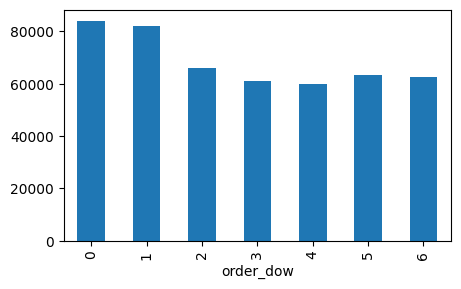

In [171]:
orders_per_day = instacart.groupby('order_dow')['user_id'].count()
orders_per_day.plot(kind='bar', figsize=(5,3))

Se observa una alza en las compras a partir del día 5, que es igual al día viernes. Por lo que el día que más compran es el día domingo, el dia lunes tambien parece ser el preferido para hacer víveres. El día que menos compras se realizan es el día jueves.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<Axes: >

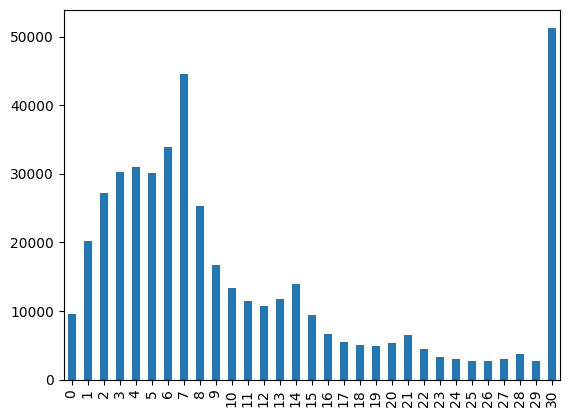

In [136]:
time_to_reorder = instacart.groupby('days_since_prior_order')['user_id'].count().reset_index()
time_to_reorder['user_id'].plot(kind='bar')

Los usuarios esperan 30 días como valor máximo para reordenar, mientras que como valores minimos, esperan entre 24 y 27 días.
Los valores del 0 corresponden a las compras diarias, los valores del día 7 sufren una alza ya que simbolizan compras semanales y el día 30, compras mensuales.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [151]:
wednesday = instacart[instacart['order_dow']==3].groupby('order_hour_of_day')['order_id'].count()
saturday = instacart[instacart['order_dow']==6].groupby('order_hour_of_day')['order_id'].count()
compared_days = pd.concat([wednesday,saturday],axis=1)
compared_days.columns = ['Wednesday','Saturday']
compared_days.head()

,Wednesday,Saturday
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118


<Axes: xlabel='order_hour_of_day'>

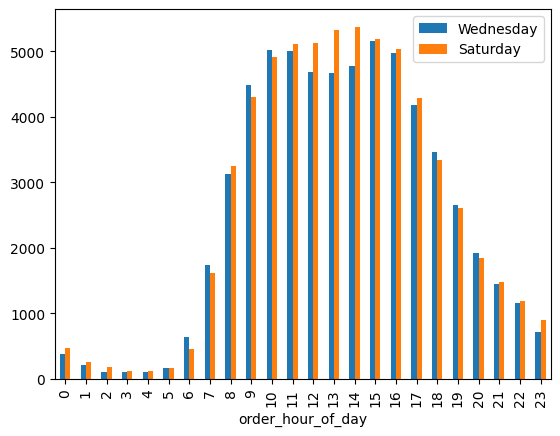

In [152]:
compared_days.plot(kind='bar')

El día miercoles se pide más en horario temprano, entre 6 10 am. Pero el resto del día, el día sabado es cuando más se ordena.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<Axes: ylabel='Frequency'>

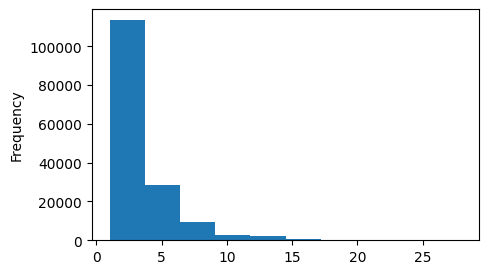

In [172]:
total_orders_per_client = instacart.groupby('user_id')['order_number'].count()
total_orders_per_client.plot(kind='hist',figsize=(5,3))

La mayoría de clientes han hecho menos de 5 pedidos.

<Axes: >

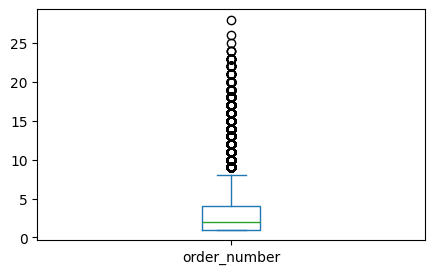

In [173]:
total_orders_per_client.plot(kind='box',figsize=(5,3))

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [219]:
top_products = orders.groupby('product_id')['order_id'].count().sort_values(ascending=False).reset_index()
top_20 = pd.merge(top_products,products, on = 'product_id').head(20)
dropped_cols = ['aisle_id','department_id']
top_20 = top_20.drop(dropped_cols,axis='columns')
top_20.head(1)

,product_id,order_id,product_name
0,24852,66050,Banana


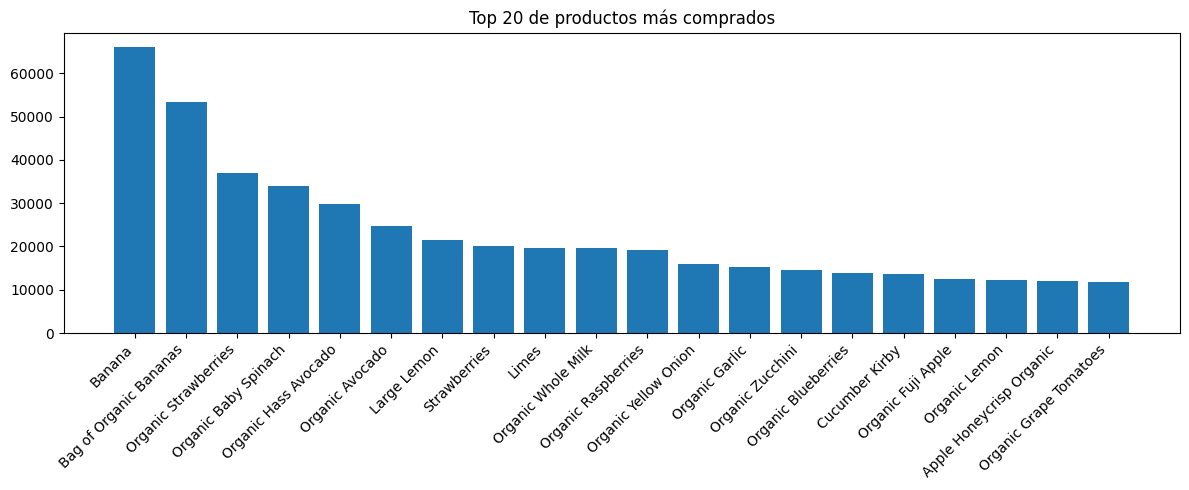

In [220]:
plt.figure(figsize=(12,5))
plt.bar(top_20['product_name'],top_20['order_id'])
plt.xticks(rotation=45,ha='right')
plt.title('Top 20 de productos más comprados')
plt.tight_layout()
plt.show()

Los productos que más se vendieron son platanos, bolsas de platano, fresas, espinacas y aguacate.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [229]:
total_products_per_order = orders.groupby('order_id')['product_id'].count().sort_values()
total_products_per_order.head(2)

order_id
2007942    1
1093599    1
Name: product_id, dtype: int64

<Axes: >

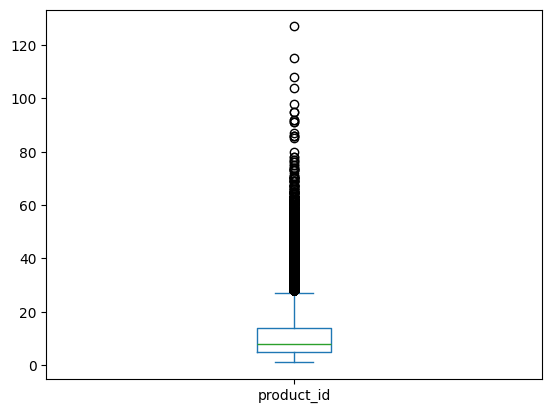

In [231]:
total_products_per_order.plot(kind='box')

In [232]:
total_products_per_order.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

In [238]:
print('Porcentajes 90/95/99: ', np.percentile(total_products_per_order,[90,95,99]))

Porcentajes 90/95/99:  [20. 25. 35.]


Completamos la gráfica de distribución mediante el cálculo de porcentajes, hemos descubierto que el 99% de ordenes tuvieron 35 o menos artículos, por lo que a partir de 36 artículos se considera como una cantidad átipica de artículos pedidos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [243]:
reordered_top = orders[orders['reordered']==1].groupby('product_id')['order_id'].count().sort_values(ascending=False).reset_index()
reordered_top_20 = pd.merge(reordered_top,products,on='product_id').head(20)
col_to_drop = ['aisle_id','department_id']
reordered_top_20 = reordered_top_20.drop(col_to_drop,axis='columns')
reordered_top_20.head(1)

,product_id,order_id,product_name
0,24852,55763,Banana


In [ ]:
plt.figure(figsize=(12,5))
plt.bar(top_20['product_name'],top_20['order_id'])
plt.xticks(rotation=45,ha='right')
plt.title('Top 20 de productos más comprados')
plt.tight_layout()
plt.show()

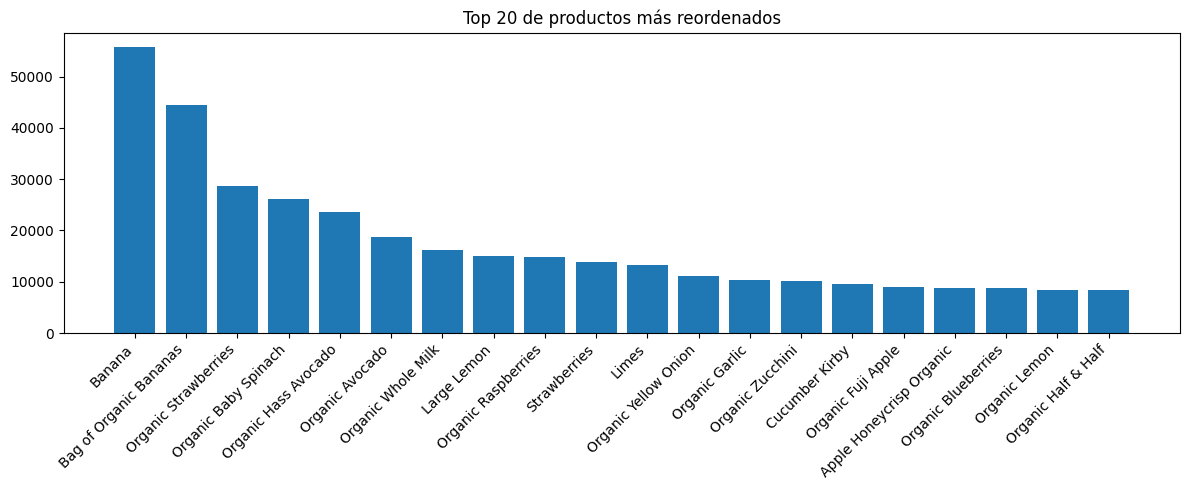

In [244]:
plt.figure(figsize=(12,5))
plt.bar(reordered_top_20['product_name'],reordered_top_20['order_id'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 de productos más reordenados')
plt.tight_layout()
plt.show()

los 5 productos más reordenados son platanos, bolsas de platano, fresas, espinacas y Aguacate.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [250]:
reorders = orders.groupby('product_id').agg(
    total_orders = ('reordered','count'),
    total_reordered = ('reordered','sum')
)
reorders['proportion'] = reorders['total_reordered'] / reorders['total_orders']
reorders.head()

,total_orders,total_reordered,proportion
product_id,,,
1,280,158,0.564286
2,11,0,0.000000
3,42,31,0.738095
4,49,25,0.510204
7,2,1,0.500000


Escribe aquí tus conclusiones

Se calculó la proporción de recompra, valores cercanos a 1 son productos que se recompran demasiado, mientras que productos con valores cercanos a 0 son productos que casi no se recompran. Es interesante saber esto ya que podríamos omitir aquellos productos que solo se compran una vez y que generan ingresos una sola vez para la empresa, mientras que se podría dar preferencia a productos con recompra que generarían más ingresos con los mismos clientes.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [254]:
products_by_user = instacart.groupby('user_id')['order_id'].count().sort_values(ascending=False).reset_index()
users_and_reorders = pd.merge(products_by_user,orders, on='order_id')
users_and_reorders.head(1)

,user_id,order_id,product_id,add_to_cart_order,reordered
0,154678,20,33452,5.0,0


In [255]:
reorders_per_user = users_and_reorders.groupby('user_id').agg(
    products_by_client = ('reordered','count'),
    products_reordered = ('reordered','sum')
)
reorders_per_user['proportion'] = reorders_per_user['products_reordered']/reorders_per_user['products_by_client']
reorders_per_user.head()

,products_by_client,products_reordered,proportion
user_id,,,
14,13,12,0.923077
54,5,5,1.000000
82,13,12,0.923077
110,13,12,0.923077
127,13,12,0.923077


Escribe aquí tus conclusiones

Se calculó la proporción de productos pedidos y su recompra, valores cercanos a 1 quiere decir que el cliente compra los mismos productos, es decir, que tiene recompra, mientras que valores cercanos a 0 son productos clientes que compran productos pero genera poca recompra de los mismos, lo que se traduce en menos ingreso para la empresa.

Vemos que las primeras 5 filas demuestran valores altos (cercanos a 1) en la proporción, eso es un indicador positivo, ya que nos demuestra que los clientes mantienen una recompra importante de los productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [258]:
first_products = orders[orders['add_to_cart_order']==1].groupby('product_id')['order_id'].count().sort_values(ascending=False).reset_index()
first_20_products = pd.merge(first_products,products,on='product_id').head(20)
cols_to_drop = ['aisle_id','department_id']
first_20_products = first_20_products.drop(cols_to_drop,axis='columns')
first_20_products.head()

,product_id,order_id,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado


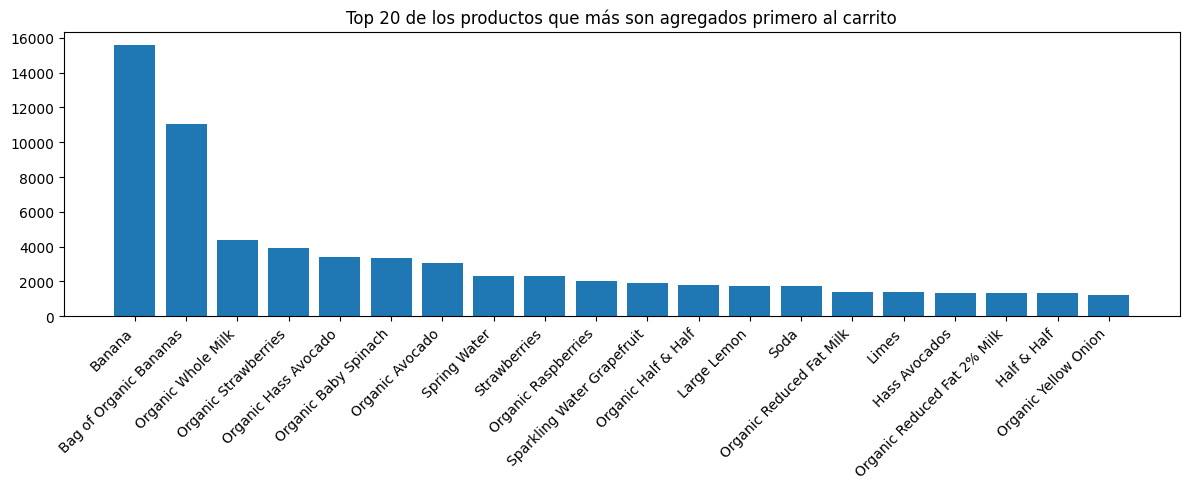

In [259]:
plt.figure(figsize=(12,5))
plt.bar(first_20_products['product_name'],first_20_products['order_id'])
plt.xticks(rotation=45,ha='right')
plt.title('Top 20 de los productos que más son agregados primero al carrito')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

Los 20 primeros productos son comestibles.

### Conclusion general del proyecto:

Se realizó un preprocesamiento de datos y se sacaron conclusiones respecto a los clientes, los productos top y la recompra de los mismos. 
Se proceso de tal forma que se descubrieron algunos errores en la captura de datos, se identificaron valores ausentes relacionados a datos logicos como la falta de días de la última compra para clientes que han hecho su primer compra, por lo que dichos ausentes son lógicos.
Además se realizaron clalculos con la información disponible que podría apoyar a la empresa a seleccionar mejor los productos que vende y que recompra tienen. Lo que se traduce en más ventas y más ingresos. Además de descubrir horarios favoritos por los clientes para realizar sus compras, con eso se puede generar estrategias de marketing que exploten esos horarios y días pico para vender más, así como realizar proyectos para aumentar las ventas en horarios y días bajos.

Por ultimo, se realizaron graficas para volver más amigable la visualización de estos calculos y conclusiones.